# **เลื่อนลงไปตรง Attacut กับ OSKut**

In [ ]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [ ]:
!gdown --id 1OxAPWlilK1gAl0_hDlMEHAUe_r-WogoG

Downloading...
From: https://drive.google.com/uc?id=1OxAPWlilK1gAl0_hDlMEHAUe_r-WogoG
To: /content/dataset.zip
100% 14.7M/14.7M [00:00<00:00, 168MB/s]


In [ ]:
!unzip -qq '/content/dataset.zip'

replace dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
#read file by glob
path_train = glob.glob('/content/dataset/train/*')
path_test = glob.glob('/content/dataset/test/*')
path_eval = glob.glob('/content/dataset/eval/*')

In [ ]:
path_train[1]

'/content/dataset/train/T11465.txt'

In [ ]:
def create_dataframe(list_path):
    data_list = []
    for item in list_path:
        with open(item, 'r') as f:
            for line in f:
                if line == '\n':
                    continue
                line = line.strip().split('\t')
                data_list.append(line)
    df = pd.DataFrame(data_list, columns = ['word', 'pos', 'entity-name', 'sentence-seg'])
    df['pos'] = df['pos'].fillna('O')
    df['entity-name'] = df['entity-name'].fillna('O')
    df['sentence-seg'] = df['sentence-seg'].fillna('O')
    return df

IndentationError: ignored

In [ ]:
train_df = create_dataframe(path_train)
test_df = create_dataframe(path_test)
eval_df = create_dataframe(path_eval)

NameError: ignored

In [ ]:
test_df['pos'].str.find('O')

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
207273   -1
207274   -1
207275   -1
207276   -1
207277   -1
Name: pos, Length: 207278, dtype: int64

In [ ]:
train_df

,word,pos,entity-name,sentence-seg
0,"""",PU,O,B_CLS
1,มิ่งขวัญ,NN,B_PER,I_CLS
2,"""",PU,O,I_CLS
3,พร้อม,PS,O,I_CLS
4,บอร์ด,NN,O,I_CLS
...,...,...,...,...
2714721,ไว้,AX,O,I_CLS
2714722,กับ,PS,O,I_CLS
2714723,พนักงาน,NN,O,I_CLS
2714724,สอบสวน,VV,O,I_CLS


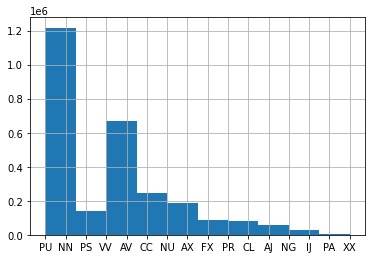

In [ ]:
train_df['pos'].hist()

In [ ]:
#Name entities count
check_df = eval_df['entity-name'].str.find('B_', end=2)
check_df = pd.DataFrame(check_df)
check_df['entity-name'].value_counts(0)

-1    217684
 0     23176
Name: entity-name, dtype: int64

In [ ]:
sentence_df = test_df['sentence-seg'].str.find('new line')
sentence_df = pd.DataFrame(sentence_df)
sentence_df['sentence-seg'].value_counts(0)

-1    207278
Name: sentence-seg, dtype: int64

# **Attacut**

In [ ]:
!pip -qq install pythainlp
!pip -qq install epitran
!pip -qq install python-crfsuite
!pip -qq install attacut

In [ ]:
import pythainlp
from pythainlp import sent_tokenize
from pythainlp import word_tokenize
from pythainlp import word_tokenize, Tokenizer
import pandas as pd
from pythainlp.tokenize.multi_cut import find_all_segment, mmcut, segment
# from pythainlp.tokenize import dict_trie
from pythainlp.corpus.common import thai_words
from pythainlp.util import normalize

In [ ]:
!gdown --id 11EAAsZ3ofLUOT5UIu85PTTkSvO-DKdhP

Downloading...
From: https://drive.google.com/uc?id=11EAAsZ3ofLUOT5UIu85PTTkSvO-DKdhP
To: /content/ws_test.txt
100% 106k/106k [00:00<00:00, 54.8MB/s]


In [ ]:
# text = "สวัสดีจ้าทดลองตัดคำจ้าาา"
# print(word_tokenize(text))
# print(text)

In [ ]:
# data_path = '/content/ws_test.txt'

# test_data = open(data_path, 'r')

# text = test_data.readlines()
# word_normalize = normalize(text[0])
# print(word_normalize)
# print(word_tokenize(word_normalize))

In [ ]:
data_path = '/content/ws_test.txt'
test_data = open(data_path, 'r')
text = test_data.readlines()


test_text = word_tokenize(text[0], engine='attacut')
        
print(test_text)


['ที่', 'ยัง', 'สถานการณ์', 'ยัง', 'ไม่', 'คลี่คลาย', 'อาจ', 'ส่ง', 'ผล', 'กระทบ', 'การ', 'ค้า', 'ชาย', 'แดน', 'ไทย', ' ', '-', ' ', 'กัมพูชา', ' ', 'ว่า', ' ', 'เท่า', 'ที่', 'เข้า', 'ไป', 'ดำเนิน', 'การ', 'ตรวจสอบ', 'ยัง', 'ไม่', 'พบ', 'ว่า', 'มี', 'การ', 'ปิด', 'ด่าน', 'บริเวณ', 'ดัง', 'กล่าว', ' ', 'และ', 'ที่', 'สำคัญ', 'การ', 'ค้า', 'ระหว่าง', 'ไทย', 'และ', 'กัมพูชา', 'ส่วน', 'ใหญ่', 'จะ', 'มี', 'ปริมาณ', 'มาก', 'ที่', 'ด่านปอยเปต', ' ', 'อ. อรัญประเทศ', ' ', 'จ. สระแก้ว', ' ', 'มาก', 'กว่า', 'ด่าน', 'อื่น', ' ', 'ๆ', ' ', 'ส่วน', 'ที่', 'กัน', 'ทรลักษ์', 'เป็น', 'ด่าน', 'ขนาด', 'เล็ก', 'จะ', 'เน้น', 'ด้าน', 'ท่องเที่ยว', ' ', 'จึง', 'ไม่', 'น่า', 'ส่ง', 'ผล', 'กระทบ', 'ต่อ', 'บรรยากาศ', 'การค้า', 'ชาย', 'แดน', 'ไทย', ' ', '-', ' ', 'กัมพูชา', 'แต่อย่างใด', ' ', 'อย่าง', 'ไร', 'ก็ตาม', ' ', 'แม้', 'จะ', 'มี', 'ปัญหา', 'ความ', 'ขัดแย้ง', 'เรื่อง', 'เขาพระวิหาร', ' ', 'แต่', 'ปริมาณ', 'การ', 'ค้า', 'ชาย', 'แดน', 'ไทย', ' ', '-', ' ', 'กัมพูชา', 'ใน', 'ปี', 'ที่', 'ผ่าน', 'มา', 'ยัง

In [ ]:
def split(word):
    return list(word)

In [ ]:
l

In [ ]:
import pandas as pd

In [ ]:
def submission(test_text):
    data = []
    label = []
    for i in test_text:
        a = split(i)
        
        for index, j in enumerate(a):
            if index == 0:
                label.append('B_WORD')
            elif index == len(a)-1:
                label.append('E_WORD')
            else:
                label.append('I_WORD') 
        data.extend(a)
        
    label = pd.DataFrame(label)
    data = pd.DataFrame(data)    
    data_submission = pd.concat([data, label], axis = 1)
    return data_submission
    

submission(test_text)





,0,0
0,ท,B_WORD
1,ี,I_WORD
2,่,E_WORD
3,ย,B_WORD
4,ั,I_WORD
...,...,...
37243,ย,E_WORD
37244,แ,B_WORD
37245,ล,I_WORD
37246,้,I_WORD


In [ ]:
def create_data(data):
    data= []
    for i in data:
            a = split(i)
            data.append(a)
    return data
    
create_data(test_text)


[]

In [ ]:
data = []
label = []
def submission(test_text):
    for i in test_text:
        data = split(test_text)
        for j in data:
            if j == data[0]:
                label.append('B_WORD')
            elif j == data[len(data)-1]:
                label.append('E_WORD')
            else:
                label.append('I_WORD')
        return label


In [ ]:
# for i in test_text:
#     word = test_text[i].split()
#     print(word) 

# **OSKut**


In [ ]:
!pip -qq install OSKut
!pip -qq install sefr_cut

In [ ]:
import sys
import oskut
# import sefr_cut
import numpy as np

In [ ]:
oskut.load_model(engine='ws')
print(oskut.OSKut(text))


['ที่', 'ยัง', 'สถานการณ์', 'ยัง', 'ไม่', 'คลี่', 'คลาย', 'อาจส่ง', 'ผล', 'กระทบการ', 'ค้า', 'ชาย', 'แดน', 'ไทย', ' ', '-', ' ', 'กัม', 'พู', 'ชา', ' ', 'ว่า', ' ', 'เท่า', 'ที่', 'เข้า', 'ไป', 'ดำ', 'เนิน', 'การ', 'ตรวจ', 'สอบ', 'ยัง', 'ไม่', 'พบ', 'ว่า', 'มี', 'การ', 'ปิด', 'ด่าน', 'บริเวณ', 'ดัง', 'กล่าว', ' ', 'และ', 'ที่', 'สำคัญการ', 'ค้า', 'ระหว่าง', 'ไทย', 'และ', 'กัม', 'พูชา', 'ส่วนใหญ่', 'จะ', 'มี', 'ปริมาณ', 'มาก', 'ที่', 'ด่าน', 'ปอย', 'เปต', ' ', 'อ.', ' ', 'อรัญประเทศ', ' ', 'จ.', ' ', 'สระแก้ว', ' ', 'มาก', 'กว่า', 'ด่าน', 'อื่น', ' ', 'ๆ', ' ', 'ส่วน', 'ที่', 'กันทร', 'ลักษ์', 'เป็น', 'ด่าน', 'ขนาด', 'เล็ก', 'จะ', 'เน้น', 'ด้าน', 'ท่องเที่ยว', ' ', 'จึง', 'ไม่', 'น่า', 'ส่ง', 'ผล', 'กระทบ', 'ต่อบรรยากาศการ', 'ค้า', 'ชาย', 'แดน', 'ไทย', ' ', '-', ' ', 'กัม', 'พูชา', 'แต่', 'อย่าง', 'ใด', ' ', 'อย่าง', 'ไร', 'ก็', 'ตาม', ' ', 'แม้', 'จะ', 'มี', 'ปัญหา', 'ความ', 'ขัดแย้ง', 'เรื่อง', 'เขา', 'พระวิหาร', ' ', 'แต่', 'ปริมาณ', 'การ', 'ค้า', 'ชาย', 'แดน', 'ไทย', ' ', '-', ' ', 